In [4]:
import pretty_midi
import numpy as np
import datapreparation as datp
reload(datp)
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch import nn

In [1]:
pwd

u'/home/ahomec/e/eddasilv/deeplearningcourse'

In [5]:
import model as mymodel
reload(mymodel)
import dataset as dats
reload(dats)

<module 'dataset' from 'dataset.pyc'>

In [6]:
data = dats.pianoroll_dataset_chunks("/home/ahomec/e/eddasilv/datasets/classical")


In [33]:
model = mymodel.Composer(input_size=128, hidden_size=100, num_tags=data.num_tags(), n_layers=2)


In [30]:
def gen_music(model,composer=0):
    song=model.generate( torch.LongTensor([composer]).unsqueeze(1),10000,10)
    #datp.visualize_piano_roll(( song.squeeze(1).detach().numpy()).astype(int).T)
    #return datp.embed_play_v1(( song.squeeze(1).detach().numpy()).astype(int).T)
    return song

In [ ]:
rnn = model

criterion = nn.BCELoss()
tol=0.0001
learning_rate = 0.001
optimizer = torch.optim.Adam(rnn.parameters(), lr=learning_rate)
n_epochs=100
acc_loss = []
songs = []
for i in xrange(n_epochs):
    data.gen_batch(60,30)
    epoch_loss = []
    for item in data:
        optimizer.zero_grad()
        res=model(item[0],item[1])
        loss=criterion(res[0],item[-1])
        loss.backward()
        optimizer.step()
        epoch_loss.append(loss)
    epoch_loss = torch.tensor(epoch_loss)
    acc_loss.append(epoch_loss.mean())
    if(i%5==0):
        print("epoch "+str(i)+" avg loss="+str(epoch_loss[-1].mean()))
    if(i%10==0):
        songs.append(gen_music(rnn))
    if((i>10) and np.abs(acc_loss[i]-acc_loss[i-1])<tol):
        break
acc_loss = torch.tensor(acc_loss)
print("final "+str(i)+" avg loss="+str(acc_loss.mean()))


epoch 0 avg loss=tensor(0.0700)
epoch 5 avg loss=tensor(0.0542)
epoch 10 avg loss=tensor(0.0667)
epoch 15 avg loss=tensor(0.0949)


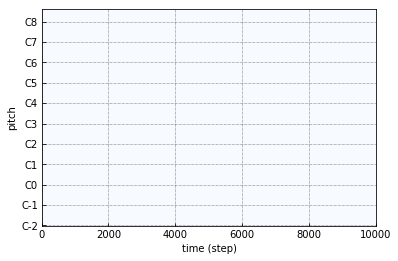

In [28]:
gen_music(rnn)

array([0., 1.], dtype=float32)

In [ ]:
i